# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#starter code cell


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
from datetime import date
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
weather_response = requests.get(query_url)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent = 4))

{
    "coord": {
        "lon": -52,
        "lat": 1
    },
    "weather": [
        {
            "id": 801,
            "main": "Clouds",
            "description": "few clouds",
            "icon": "02n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 72.55,
        "feels_like": 76.86,
        "temp_min": 72.55,
        "temp_max": 72.55,
        "pressure": 1012,
        "humidity": 79,
        "sea_level": 1012,
        "grnd_level": 996
    },
    "visibility": 10000,
    "wind": {
        "speed": 2.26,
        "deg": 63
    },
    "clouds": {
        "all": 17
    },
    "dt": 1598497755,
    "sys": {
        "country": "BR",
        "sunrise": 1598520333,
        "sunset": 1598564021
    },
    "timezone": -10800,
    "id": 3407762,
    "name": "Amap\u00e1",
    "cod": 200
}


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city_count = 0

city_dict = {}
city_list = []

city_name_list = []
city_lat_list = []
city_lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []



print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    city_count += 1
    
    
    try:
        print(f'Processing Record Number {city_count} | {city}')
        query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        city_name_list.append(weather_json['name'])
        city_lat_list.append(weather_json['coord']['lat'])
        city_lng_list.append(weather_json['coord']['lon'])
        max_temp_list.append(weather_json['main']['temp_max'])
        humidity_list.append(weather_json['main']['humidity'])
        cloudiness_list.append(weather_json['clouds']['all'])
        wind_speed_list.append(weather_json['wind']['speed'])
        country_list.append(weather_json['sys']['country'])
        date_list.append(weather_json['dt'])
        
#         name = (weather_json['name'])
#         lat = weather_json['coord']['lat']
#         lon = weather_json['coord']['lon']
#         max_temp = weather_json['main']['temp_max']
#         humidity = weather_json['main']['humidity']
#         clouds = weather_json['clouds']['all']
#         wind_speed = weather_json['wind']['speed']
#         country = weather_json['sys']['country']
#         date = weather_json['dt']

        city_dict = {'City_Name': city_name_list,
                        'Lat': city_lat_list, 
                        'Lon': city_lng_list, 
                        'Max_Temp': max_temp_list, 
                        'Humidity': humidity_list,
                        'Clouds': cloudiness_list,
                        'Wind_Speed': wind_speed_list,
                        'Country': country_list,
                        'Date': date_list}

                                  

        
    except:
        print("City not found. Skipping...")

Beginning Data Retrieval
-----------------------------
Processing Record Number 1 | qaanaaq
Processing Record Number 2 | kavieng
Processing Record Number 3 | hamilton
Processing Record Number 4 | port elizabeth
Processing Record Number 5 | hilo
Processing Record Number 6 | ostersund
Processing Record Number 7 | kodino
Processing Record Number 8 | kilindoni
Processing Record Number 9 | kavaratti
Processing Record Number 10 | maniitsoq
Processing Record Number 11 | naze
Processing Record Number 12 | khatanga
Processing Record Number 13 | hermanus
Processing Record Number 14 | bryan
Processing Record Number 15 | thompson
Processing Record Number 16 | yara
Processing Record Number 17 | kautokeino
Processing Record Number 18 | arezzo
Processing Record Number 19 | cape town
Processing Record Number 20 | lorengau
Processing Record Number 21 | busselton
Processing Record Number 22 | punta arenas
Processing Record Number 23 | albany
Processing Record Number 24 | olyka
Processing Record Number 2

Processing Record Number 193 | east london
Processing Record Number 194 | raudeberg
Processing Record Number 195 | rumuruti
Processing Record Number 196 | kelvington
Processing Record Number 197 | port macquarie
Processing Record Number 198 | sitka
Processing Record Number 199 | longyearbyen
Processing Record Number 200 | mae hong son
Processing Record Number 201 | chuy
Processing Record Number 202 | kruisfontein
Processing Record Number 203 | muros
Processing Record Number 204 | ancud
Processing Record Number 205 | alakurtti
Processing Record Number 206 | sovetskaya gavan
Processing Record Number 207 | barra velha
Processing Record Number 208 | omutinskoye
City not found. Skipping...
Processing Record Number 209 | imbituba
Processing Record Number 210 | asyut
Processing Record Number 211 | manzhouli
Processing Record Number 212 | mehamn
Processing Record Number 213 | leningradskiy
Processing Record Number 214 | miri
Processing Record Number 215 | nome
Processing Record Number 216 | or

Processing Record Number 385 | bolungarvik
City not found. Skipping...
Processing Record Number 386 | bozhou
Processing Record Number 387 | isilkul
Processing Record Number 388 | portobelo
Processing Record Number 389 | san quintin
Processing Record Number 390 | pacific grove
Processing Record Number 391 | goderich
Processing Record Number 392 | sorland
Processing Record Number 393 | pringsewu
Processing Record Number 394 | santa fe
Processing Record Number 395 | wahran
City not found. Skipping...
Processing Record Number 396 | sabha
Processing Record Number 397 | luau
Processing Record Number 398 | bhag
Processing Record Number 399 | zhigansk
Processing Record Number 400 | carauari
Processing Record Number 401 | isangel
Processing Record Number 402 | sterling
Processing Record Number 403 | nizhnyaya maktama
Processing Record Number 404 | barbar
City not found. Skipping...
Processing Record Number 405 | apucarana
Processing Record Number 406 | da nang
Processing Record Number 407 | isl

Processing Record Number 579 | danville
Processing Record Number 580 | fare
Processing Record Number 581 | kawardha
Processing Record Number 582 | vanderhoof
Processing Record Number 583 | morada nova
Processing Record Number 584 | oeiras do para
Processing Record Number 585 | chapais
Processing Record Number 586 | bolshegrivskoye
City not found. Skipping...
Processing Record Number 587 | lebanon
Processing Record Number 588 | port keats
Processing Record Number 589 | magan
Processing Record Number 590 | nanortalik
Processing Record Number 591 | tura
Processing Record Number 592 | richards bay
Processing Record Number 593 | shenjiamen
Processing Record Number 594 | kurduvadi
Processing Record Number 595 | buin
Processing Record Number 596 | birao
Processing Record Number 597 | sompeta
Processing Record Number 598 | huambo
Processing Record Number 599 | ocean city
Processing Record Number 600 | roebourne
Processing Record Number 601 | carros
Processing Record Number 602 | rantauprapat


In [5]:
city_dict

{'City_Name': ['Qaanaaq',
  'Kavieng',
  'Hamilton',
  'Port Elizabeth',
  'Hilo',
  'Östersund',
  'Kodino',
  'Kilindoni',
  'Kavaratti',
  'Maniitsoq',
  'Naze',
  'Khatanga',
  'Hermanus',
  'Bryan',
  'Thompson',
  'Yara',
  'Kautokeino',
  'Arezzo',
  'Cape Town',
  'Lorengau',
  'Busselton',
  'Punta Arenas',
  'Albany',
  'Olyka',
  'São Filipe',
  'Peoria',
  'Amahai',
  'Mar del Plata',
  'Faanui',
  'Yerbogachën',
  'Biak',
  'Geraldton',
  'Przeworsk',
  'Barrow',
  'Ushuaia',
  'Jaisalmer',
  'Ilulissat',
  'Puerto Ayora',
  'Barabinsk',
  'Barras',
  'Hithadhoo',
  'Esim',
  'Mataura',
  'Virpur',
  'Sergeevka',
  'Trat',
  'Noumea',
  'Calderitas',
  'Torbay',
  'Kathmandu',
  'Lüderitz',
  'Ribeira Grande',
  'Murgab',
  'Tashara',
  'Rikitea',
  'Hobart',
  'Piaçabuçu',
  'Bluff',
  'Atuona',
  'Fortuna',
  'Carutapera',
  'São Félix do Xingu',
  'Tuatapere',
  'Yangi Marg`ilon',
  'Tasiilaq',
  'Gubkinskiy',
  'Kapaa',
  'Plastun',
  'Iqaluit',
  'Vandavāsi',
  'James

In [6]:
city_dict.keys()

dict_keys(['City_Name', 'Lat', 'Lon', 'Max_Temp', 'Humidity', 'Clouds', 'Wind_Speed', 'Country', 'Date'])

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# file = open('city_data.csv', 'w',)

# with file:
#     header = ['City_Name', 'Lat', 'Lon', 'Max_Temp', 'Humidity', 'Clouds', 'Wind_Speed', 'Country', 'Date']
              
#     writer = csv.DictWriter(file, fieldnames = header)
#     writer.writeheader()
    
#     writer.writerow(city_dict)

with open('city_data.csv', 'w', encoding = "utf-8") as f:           #for the utf-8 -> https://www.youtube.com/watch?v=TumTf8-wY1k
    for key in city_dict.keys():
        f.write("%s,%s\n"%(key,city_dict[key]))          #https://www.tutorialspoint.com/How-to-save-a-Python-Dictionary-to-CSV-file#:~:text=Use%20csv%20module%20from%20Python's,pair%20in%20comma%20separated%20form.&text=The%20csv%20module%20contains%20DictWriter,list%20object%20containing%20field%20names.
        

In [8]:
city_df  = pd.DataFrame(city_dict)

In [9]:
city_df.set_index('City_Name')

,Lat,Lon,Max_Temp,Humidity,Clouds,Wind_Speed,Country,Date
City_Name,,,,,,,,
Qaanaaq,77.48,-69.36,37.31,88,100,14.38,GL,1598497623
Kavieng,-2.57,150.80,85.28,64,36,3.42,PG,1598497668
Hamilton,39.18,-84.53,81.00,74,1,5.82,US,1598497374
Port Elizabeth,-33.92,25.57,57.20,76,90,14.99,ZA,1598497673
Hilo,19.73,-155.09,84.20,62,20,10.29,US,1598497364
...,...,...,...,...,...,...,...,...
Huambo,-12.78,15.74,53.60,85,17,3.47,AO,1598497848
Ocean City,39.28,-74.57,77.00,73,75,9.15,US,1598497848
Roebourne,-20.78,117.13,92.66,17,0,11.68,AU,1598497848


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
city_df['Humidity']

0      88
1      64
2      74
3      76
4      62
       ..
545    85
546    73
547    17
548    78
549    55
Name: Humidity, Length: 550, dtype: int64

In [11]:
extra_humid = 0

for h in city_df['Humidity']:
    if h > 100:
        extra_humid =+ 1
        
if extra_humid > 0:
    print("You need to do this step!")

else:
    print("You can skip this step!")

You can skip this step!


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [12]:
city_df.head(1)

,City_Name,Lat,Lon,Max_Temp,Humidity,Clouds,Wind_Speed,Country,Date
0,Qaanaaq,77.48,-69.36,37.31,88,100,14.38,GL,1598497623


In [30]:
current_date = date.today()

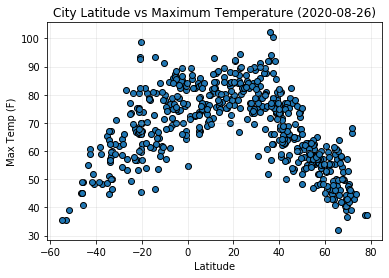

In [35]:
lat_plot = city_df['Lat']
temp_plot = city_df['Max_Temp']

plt.scatter(lat_plot, temp_plot, edgecolor="k")
plt.title(f'City Latitude vs Maximum Temperature ({current_date})')
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')
plt.grid(b = True, alpha = .25)
plt.savefig('Lat_vs_Temp.png')

# Analyzing how maximum temperature is affected by the change in latitude

## Latitude vs. Humidity Plot

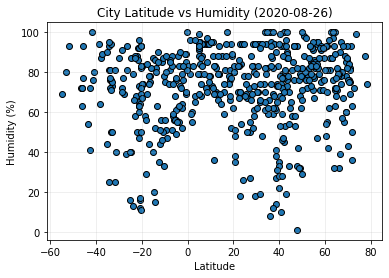

In [36]:
humidity_plot = city_df['Humidity']

plt.scatter(lat_plot, humidity_plot, edgecolor="k")
plt.title(f'City Latitude vs Humidity ({current_date})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(b = True, alpha = .25)
plt.savefig('Lat_vs_Humidity.png')

# Analyzing how humidity is affected by the change in latitude

## Latitude vs. Cloudiness Plot

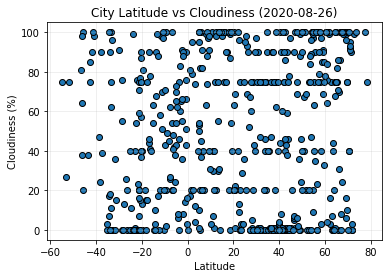

In [38]:
clouds_plot = city_df['Clouds']

plt.scatter(lat_plot, clouds_plot, edgecolor="k")
plt.title(f'City Latitude vs Cloudiness ({current_date})')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(b = True, alpha = .25)
plt.savefig('Lat_vs_Clouds.png')

# Analyzing how cloudiness is affected by the change in latitude

## Latitude vs. Wind Speed Plot

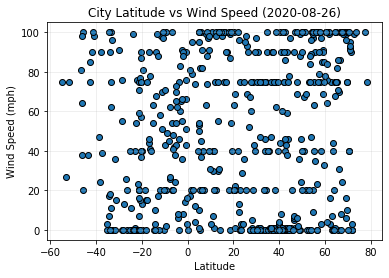

In [39]:
windSpeed_plot = city_df['Wind_Speed']

plt.scatter(lat_plot, clouds_plot, edgecolor="k")
plt.title(f'City Latitude vs Wind Speed ({current_date})')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(b = True, alpha = .25)
plt.savefig('Lat_vs_WindSpeed.png')

# Analyzing how cloudiness is affected by the change in latitude

## Linear Regression

In [46]:
city_df.head(0)

,City_Name,Lat,Lon,Max_Temp,Humidity,Clouds,Wind_Speed,Country,Date


In [ ]:
city_df.loc('')

In [82]:
lat_north = []
lat_south = []

temp_north = []
temp_south = []

humi_north = []
humi_south = []

clouds_north = []
clouds_south = []

wind_north = []
wind_south = []

temp_iso = city_df['Max_Temp']

for lat in city_df['Lat']:
    if lat >= 0:
        lat_north.append(lat)
        
    elif lat < 0:
        lat_south.append(lat)


temp_north.append(city_df['Max_Temp'])
humi_north.append(city_df['Humidity'])
clouds_north.append(city_df['Clouds'])
wind_north.append(city_df['Wind_Speed'])
        
        
        
for temp in city_df['Lat']:
    if temp >= 0:
        temp_north.append(temp)
    elif temp < 0:
        temp_south.append(temp)

# for humi in city_df['Humidity']:
#     if humi >= 0:
#         humi_north.append(humi)
#     elif humi < 0:
#         humi_south.append(humi)
        
# for clouds in city_df['Clouds']:
#     if clouds >= 0:
#         clouds_north.append(clouds)
#     elif temp < 0:
#         clouds_north.append(clouds)

# for wind in city_df['Wind_Speed']:
#     if wind >= 0:
#         wind_north.append(wind)
#     elif temp < 0:
#         wind_north.append(wind)

north_dict = {'Latitude (North)': lat_north,
                'Temp (North)': temp_north, 
                'Humidity (North)': humi_north,
                'Clouds (North)': clouds_north,
                'Wind_Speed (North)': wind_north}

In [83]:
print(len(lat_north))
print(len(temp_north))
print(len(humi_north))
print(len(clouds_north))
print(len(wind_north))

north_dict['Temp (North)']

380
551
1
1
1


[0      37.31
 1      85.28
 2      81.00
 3      57.20
 4      84.20
        ...  
 545    53.60
 546    77.00
 547    92.66
 548    73.40
 549    87.19
 Name: Max_Temp, Length: 550, dtype: float64,
 37.31,
 85.28,
 81.0,
 57.2,
 84.2,
 44.6,
 46.11,
 76.78,
 81.95,
 47.55,
 84.2,
 66.52,
 51.1,
 80.6,
 55.4,
 76.51,
 39.11,
 64.99,
 55.99,
 83.52,
 66.99,
 35.6,
 63.0,
 57.99,
 77.54,
 81.0,
 82.56,
 59.0,
 78.17,
 59.52,
 81.73,
 64.4,
 62.01,
 39.2,
 35.6,
 82.47,
 42.8,
 66.99,
 60.46,
 74.1,
 83.26,
 73.76,
 45.0,
 80.13,
 59.07,
 87.8,
 75.2,
 83.34,
 61.0,
 75.2,
 53.4,
 73.65,
 62.6,
 58.39,
 68.47,
 60.8,
 71.33,
 45.0,
 77.99,
 57.99,
 75.96,
 78.91,
 45.0,
 68.0,
 32.0,
 60.37,
 84.2,
 78.75,
 42.8,
 84.56,
 66.99,
 62.6,
 88.52,
 79.0,
 89.49,
 49.32,
 64.4,
 48.2,
 46.4,
 57.94,
 64.27,
 44.6,
 80.6,
 64.78,
 82.38,
 55.4,
 66.2,
 68.0,
 87.8,
 61.07,
 57.0,
 83.17,
 54.82,
 57.2,
 83.3,
 75.2,
 48.33,
 60.8,
 46.24,
 60.8,
 55.4,
 41.0,
 84.2,
 82.4,
 74.01,
 77.0,
 57.2

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression